In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report

In [3]:
#create synthetic data
np.random.seed(42)
data=pd.DataFrame({
    "Age":np.random.randint(18,70,200),
    "Salary":np.random.randint(20_000,150_000,200)
})
data["Purchased"]=np.where((data["Age"]>40)&(data["Salary"]>70_000),1,0)

In [5]:
#prepare data
x=data[["Age","Salary"]]
y=data["Purchased"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
#scale features
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [14]:
# train svm model
model=svm.SVC(kernel="rbf")
model.fit(x_train_scaled,y_train
         )

SVC()

In [18]:
#evaluate model
y_pred=model.predict(x_test_scaled)
print(f"Accuracy:{accuracy_score(y_test,y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test,y_pred))

Accuracy:0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      0.86      0.92        14

    accuracy                           0.95        40
   macro avg       0.96      0.93      0.94        40
weighted avg       0.95      0.95      0.95        40



In [22]:
#make new predictions
new_customers=pd.DataFrame({
    "Age":[30,45,60],
    "Salary":[50_000,80_000,30_000]
})
new_customers_scaled=scaler.transform(new_customers)
predictions=model.predict(new_customers_scaled)

In [24]:
print("\n New Customer predictions:")
for i, (age,salary) in enumerate(zip(new_customers["Age"],new_customers["Salary"])):
    print(f"Age {age},Salary ${salary:,}:{"Will buy"if predictions[i] else "will not buy" }")


 New Customer predictions:
Age 30,Salary $50,000:will not buy
Age 45,Salary $80,000:will not buy
Age 60,Salary $30,000:will not buy


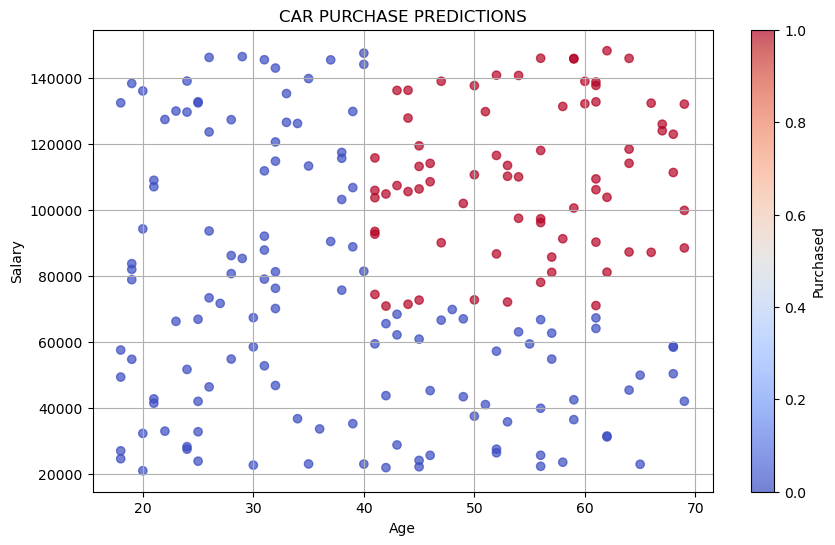

In [30]:
#visual
plt.figure(figsize=(10,6))
plt.scatter(data["Age"],data["Salary"],c=data["Purchased"],cmap="coolwarm",alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("CAR PURCHASE PREDICTIONS")
plt.colorbar(label="Purchased")
plt.grid(True)
plt.show()